# **Analysis of the Intrusion Detection Evaluation Dataset (CIC-IDS2017)**

## 1. An overview of the Dataset including the Dataset Characteristics and Exploratory Data Analysis, Data Preprocessing, and performance of different models.

- **Dataset Characteristics:** CIC-IDS2017 dataset contains network traffic data for the development and evaluation of intrusion detection systems. The dataset is designed to be representative of modern network traffic and includes more than 2.8 million network packets captured over a period of seven days in a real network environment. The dataset includes normal traffic and seven different attack scenarios: Brute Force, Heartbleed, Botnet, DoS, DDoS, Web Attack and Infiltration. The dataset is highly imbalanced. The majority of records belongs to the 'Benign' class and relatively few records belongs to the other classes. The dataset consists of 2830743 rows and 79 columns. In these columns, 78 of them are features that are numerical and the 'label' column is categorical.

- **Exploratory Data Analysis:** This dataset have many duplicate values (308381), which creates bias that is not good for the machine learning model. The number of missing values and infinite values on two columns 'Flow Bytes/s' and 'Flow Packets/s' are very few comparing to the size of the dataset which is only 0.06% (1564). However, the values were handled using appropriate methods.

- **Data Preprocessing:** We dropped the duplicates, replaced any infinite values (positive or negative) with NaN (not a number) and filled the missing values with median values. Since we have a very large dataset, the initial memory usage is quite high leading to session crashes. We later worked our way through this by down casting data types based on the min and max values available. We try to reduce the memory usages that is helpful for our model.

- **Data Analysis:** We grouped similar attacks together to analyze the dataset and identify patterns in the different types of attacks. We took a sample from the population (20%). Later we did some data analysis which consist of plotting various kinds of charts, correlation matrices etc. to see the relationships between features, types of attacks present in the dataset etc. In our analysis, we noticed there are a good number of features that are strongly, even directly correlated with other features (both positive and negative). This is an issue it introduces multi-collinearity which can highly impact the machine learning models that we will develop later.

  Also, as the dataset is quite huge and has more than 70 features, it would be extremely difficult to train models using limited resources. In order to overcome this issue, we used PCA (Principal Component Analysis) to reduece dimensions. We played with the number of components to see how much information we can preserve. We monitored the '*explained_variance_ratio_*' to make sure we retain most informations. However, it was a bit challenging to reduce dimensions while preserving the information to train the models. We performed StandardScaler before performing Incremental PCA.

- **ML Models:** It is worth mentioning the fact that the following dataset is highly imbalanced. So, we created a balanced dataset out of this with our domain knowledge to train various ML models. Since our dataset is quite large and has a reasonable amount of samples to train and test different ML models using various classification algorithms (Logistic Regression, Support Vector Machine for Binary Classification and Random Forest Classifier, Decision Tree, K Nearest Neighbours for Multi-class Classification).

  For binary classifications, we trained the models to distinguish between normal traffic and anomalous traffic. This means it will only predict whether an intrusion is taking place or not. Alternatively, using the multi-class classification algorithms, we further extended our prediction capabilities to identify which type of attack or intrusion is taking place. We tried both binary classifications and multi-class classifications to see how the data holds up. Later we cross-validated, evaluated and compared those models to see which one works better or worse.

- **Performance Evaluation:** After training multiple machine learning models, we proceeded to evaluate their respective performances. Our evaluation process involved comparing the accuracy, recall, f1-score and confusion matrix of each model. Through analysis of the results, we were able to see which model performed the best and which performed worse.

## Download Link

[CIC-IDS2017 Dataset](http://cicresearch.ca/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip)

## 2.	Dataset Characteristics and Exploratory Data Analysis

### 2.1 Load, View Data and Show Analysis on Rows and Columns

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

current_dir = os.getcwd()

In [2]:
# Loading the dataset
data1 = pd.read_csv(f'{current_dir}/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
data2 = pd.read_csv(f'{current_dir}/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
data3 = pd.read_csv(f'{current_dir}/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')
data4 = pd.read_csv(f'{current_dir}/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data5 = pd.read_csv(f'{current_dir}/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6 = pd.read_csv(f'{current_dir}/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data7 = pd.read_csv(f'{current_dir}/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data8 = pd.read_csv(f'{current_dir}/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [3]:
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]

print('Data dimensions: ')
for i, data in enumerate(data_list, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 529918 rows, 79 columns
Data2 -> 445909 rows, 79 columns
Data3 -> 692703 rows, 79 columns
Data4 -> 170366 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 191033 rows, 79 columns
Data7 -> 286467 rows, 79 columns
Data8 -> 225745 rows, 79 columns


In [4]:
data = pd.concat(data_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


In [5]:
# Deleting dataframes after concating to save memory
for d in data_list: del d

In [6]:
# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [7]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [9]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
data.describe().transpose()

Overview of Columns:


/home/alexin/Documents/Cours/TelecomSE/FISE2/Semestre 7/Projet/AdversarialNIDS/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/alexin/Documents/Cours/TelecomSE/FISE2/Semestre 7/Projet/AdversarialNIDS/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


In [10]:
pd.options.display.max_columns = 80
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3.000000e+06,5.000000e+05,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,6.666667e+05,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.967213e+05,3.278689e+04,61.0,0.0,61,61,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.639344e+04,16393.44262,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.666667e+05,2.777778e+04,72.0,0.0,72,72,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.388889e+04,13888.88889,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.600000e+05,2.666667e+04,75.0,0.0,75,75,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.333333e+04,13333.33333,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,2.500000e+05,4.166667e+04,48.0,0.0,48,48,48,48.0,0.0,48,48,0,0.0,0.0,0,0,0,0,0,0,40,0,4.166667e+04,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,4719,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### 2.2 Data Cleaning









#### Identifying duplicate values


In [11]:
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 308381


In [12]:
data.drop_duplicates(inplace = True)
data.shape

(2522362, 79)

#### Identifying missing values


In [13]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    353
dtype: int64


In [14]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [15]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 353
Missing values after processing infinite values: 3128


In [16]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [17]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow Bytes/s              1564                        0.06
Flow Packets/s            1564                        0.06


#### Visualisation of missing data


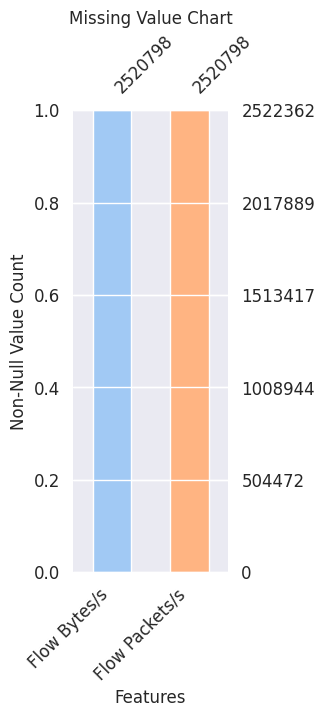

In [18]:
sns.set_palette('pastel')
colors = sns.color_palette()

missing_vals = [col for col in data.columns if data[col].isna().any()]

fig, ax = plt.subplots(figsize = (2, 6))
msno.bar(data[missing_vals], ax = ax, fontsize = 12, color = colors)
ax.set_xlabel('Features', fontsize = 12)
ax.set_ylabel('Non-Null Value Count', fontsize = 12)
ax.set_title('Missing Value Chart', fontsize = 12)
plt.show()

#### Dealing with missing values (Columns with missing data)

ValueError: cannot reindex on an axis with duplicate labels

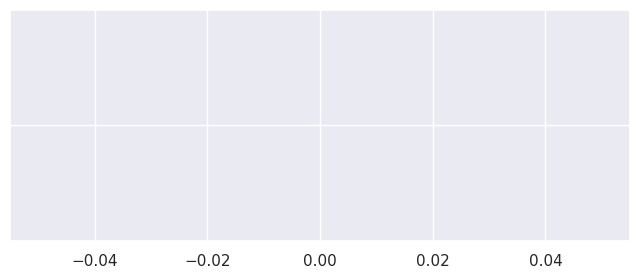

In [19]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['Flow Bytes/s'])
plt.xlabel('Boxplot of Flow Bytes/s')
plt.show()

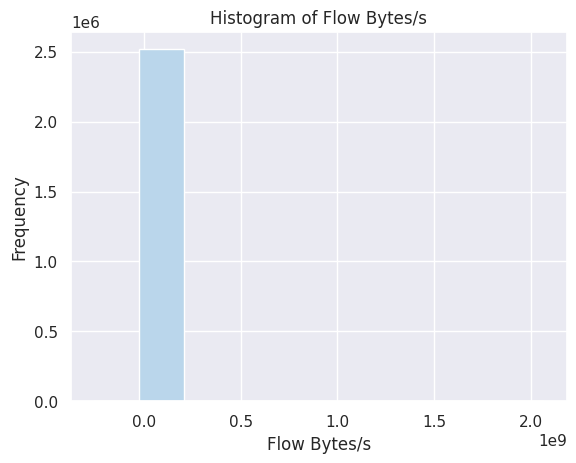

In [20]:
colors = sns.color_palette('Blues')
plt.hist(data['Flow Bytes/s'], color = colors[1])
plt.title('Histogram of Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['Flow Packets/s'])
plt.xlabel('Boxplot of Flow Packets/s')
plt.show()

In [ ]:
plt.hist(data['Flow Packets/s'], color = colors[1])
plt.title('Histogram of Flow Packets/s')
plt.xlabel('Flow Packets/s')
plt.ylabel('Frequency')
plt.show()

In [ ]:
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

In [ ]:
# Filling missing values with median
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

In [ ]:
print('Number of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())

- The first step is to identify duplicate rows and missing or invalid values. We
identified and dropped the duplicate rows (308381 rows). From the data description, we identified that the dataset has infinity values. So, we checked and replaced the positive or negative infinity values with NaN (not a number) and counted it as a missing value. In the dataset, two features, FlowBytes/s, and Flow Packets/s contain missing values. For both columns, the number of missing values is 1564 which is 0.06% of total values.

- Flow Bytes/s and Flow Packets/s are continuous variables. We can see from the Flow Bytes/s and Flow Packets/s histogram and box plot that the majority of values are towards one area which indicates that the data is not normally distributed. The box plot of the Flow Bytes/s and Flow Packets/s shows that the variables have extreme values or outliers. So, our strategy is to fill in missing values with median value. Because, filling the missing values with the median does not introduce any new categories or disrupt the distribution of the data.

### 2.3 Analysing Patterns using Visualisations

#### Visualization of column correlation. Also, plotting Heat Map

In [ ]:
data['Label'].unique()

In [ ]:
# Types of attacks & normal instances (BENIGN)
data['Label'].value_counts()

In [ ]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)

In [ ]:
data['Attack Type'].value_counts()

In [ ]:
data.drop('Label', axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

In [ ]:
# Printing corresponding attack type for each encoded value
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

In [ ]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

In [ ]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [ ]:
# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

In [ ]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

In [ ]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

- We mapped each label to the corresponding attack type. This groups similar attacks together and provides an easier and more interpretable way to analyze the dataset and identify patterns in the different types of attacks.

- For plotting the correlation matrix, we encoded the 'Attack Type' column and plotted the heatmap. From the heatmap, we observe that there are many pairs of highly correlated features. Highly correlated features in the dataset are problematic and lead to overfitting. A positive correlation exists when one variable decreases as the other variable decreases or one variable increases while the other increases. There are 32 features with positive correlations that may help in predicting the target feature.

- The columns with zero standard deviation have the same value in all rows. These columns don't have any variance. It simply means that there is no meaningful relationship with any other columns which results in NaN correlation cofficient. These columns cannot help differentiate between the classes or groups of data. So, these zero standard deviation columns don't contribute to the correlation matrix and will appear blank in the heatmap. This can be helpful while doing data processing as we may drop the columns if we find out that these columns has no variation.

#### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

In [ ]:
# Data sampling for data analysis
sample_size = int(0.2 * len(data)) # 20% of the original size
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

In [ ]:
# To assess if a sample is representative of the population and comparison of descriptive statistics (mean)
numeric_cols = data.select_dtypes(include = [np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = data[col].describe()[1]
    new = sampled_data[col].describe()[1]
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

In [ ]:
labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Variation percenatge of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [ ]:
# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

In [ ]:
'''Generating a set of visualizations for columns that have more than one unique value but less than 50 unique values.
For categorical columns, a bar plot is generated showing the count of each unique value.
For numerical columns, a histogram is generated.'''
unique_values = sampled_data.nunique()
selected_cols = sampled_data[[col for col in sampled_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

In [ ]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

In [ ]:
# Plotting the pairs of strongly positive correlated features in the sampled_data that have a correlation coefficient of 0.85 or higher
cols = list(sampled_data.columns)[:-2]
high_corr_pairs = []
corr_th = 0.85

for i in range(len(cols)):
  for j in range(i + 1, len(cols)):
    val = sampled_data[cols[i]].corr(sampled_data[cols[j]])
    # If the correlation coefficient is NaN or below the threshold, skip to the next pair
    if np.isnan(val) or val < corr_th:
      continue
    high_corr_pairs.append((val, cols[i], cols[j]))

size, cols = len(high_corr_pairs), 4
rows, rem =  size // cols, size % cols
if rem:
  rows += 1

fig, axs = plt.subplots(rows, cols, figsize = (24, int(size * 1.7)))
for i in range(rows):
    for j in range(cols):
      try:
        val, x, y = high_corr_pairs[i * cols + j]
        if val > 0.99:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'green', alpha = 0.1)
        else:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'blue', alpha = 0.1)
        axs[i, j].set_xlabel(x)
        axs[i, j].set_ylabel(y)
        axs[i, j].set_title(f'{x} vs\n{y} ({val:.2f})')
      except IndexError:
        fig.delaxes(axs[i, j])

fig.tight_layout()
plt.show()

In [ ]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)
data.drop('Attack Number', axis = 1, inplace = True)

In [ ]:
# Identifying outliers
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

In [ ]:
# Identifying outliers based on attack type
outlier_counts = {}
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        attack_data = sampled_data[i][sampled_data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

In [ ]:
# Plotting the percentage of outliers that are higher than 20%
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
        if outlier_percent > 20:
            ax.bar(f'{i} - {attack_type}', outlier_percent)

ax.set_xlabel('Feature-Attack Type')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()

- As we have a large dataset, it was both time-consuming and computationally expensive to do all the analysis on the original-sized dataset. Therefore, we sampled 20% of the dataset to do our computationally expensive analysis. We also assessed whether the sample is representative of the population by doing a comparison of descriptive statistics (mean) and features that variates 5%
higher than the actual mean values of the dataset.

- A histogram for numerical columns and a bar plot for categorical columns are generated that have more than one unique value and less than 50 unique values. The plots visualize the distribution of data in a quick and easier way. This visualizes patterns like the distribution of values in numerical columns and common categories in categorical columns. It is used to understand the relationships between different variables and identify anomalies in the data.

- The scatter plots show the relationship between strongly positive correlated features with a correlation coefficient of 0.85 or higher. Blue scatter plot points show the correlation coefficient pairs less than 0.99 and green scatter plot points show the pairs with 0.99 or almost 1.0. From these plots, we can visualize linear relationships between the features or identify indications of multicollinearity between features where two or more predictors are highly correlated. Highly correlated features introduce multicollinearity which causes problems for machine learning algorithms because it assumes that the features are independent. From some of the plots, we can see that there is a tight cluster of data points around
the straight line where the correlation coefficient is close to 1.

- We identified the outliers of each feature based on attack types and found that this dataset contains many outliers. Outliers increase variability in the dataset. But in the dataset, outliers may indicate different patterns like network intrusion attempts.

#### Visualization of column relationships (Categorical Variables)

All the features in our dataset is numerical. We have one Categorical Variable.

In [ ]:
# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = data.loc[data['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

In [ ]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

In [ ]:
# Creating a boxplot for each attack type with the columns of sampled dataset
for attack_type in sampled_data['Attack Type'].unique():
    attack_data = sampled_data[sampled_data['Attack Type'] == attack_type]
    plt.figure(figsize=(20, 20))
    sns.boxplot(data = attack_data.drop(columns = ['Attack Type']), orient = 'h')
    plt.title(f'Boxplot of Features for Attack Type: {attack_type}')
    plt.xlabel('Feature Value')
    plt.show()

In [ ]:
data.groupby('Attack Type').first()

## 3. Data Preprocessing

### Preprocessing

In [ ]:
# For improving performance and reduce memory-related errors
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

In [ ]:
# Calculating percentage reduction in memory usage
print(f'Reduced memory usage: {1 - (new_memory_usage / old_memory_usage):.2%}')

In [ ]:
data.info()

In [ ]:
data.describe().transpose()

In [ ]:
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

In [ ]:
data.shape

In [ ]:
# Columns after removing non variant columns
data.columns

- To improve performance and reduce the risk of memory-related errors (mostly session crashes), we downcasted the float and integer values based on the presence of the minimum and maximum values and reduced memory usage by 47.5%.

- The columns with zero standard deviation have the same value in all rows.
These columns don't have any variance. It simply means that there is no meaningful relationship with any other columns. These columns cannot help differentiate between the classes or groups of data. So, we dropped the columns that have no variation.

### Applying PCA to reduce dimensions


A simple and effective way to reduce the dimensionality of the dataset and improve the performance of the model is to use strongly correlated features. We used label encoding on the target feature where the numerical values assigned to each category do not have inherent meaning and they are arbitrary. For this reason, the correlation matrix calculated using label-encoded variables may not accurately reflect the true relationships between the variables.

So, a more flexible approach to feature selection can be PCA. PCA is a technique that transforms original set of variables into a smaller set of uncorrelated variables, called principal components.

PCA can capture more complex relationships between variables that may not be evident from correlation matrix analysis. It can also help to reduce the risk of overfitting.

Here, we applied Incremental PCA. Incremental PCA is a variant of PCA that allows for the efficient computation of principal components of a large dataset that cannot be stored in memory.

We applied StandardScaler before performing Incremental PCA to standardize the data values into a standard format.


In [ ]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = data.drop('Attack Type', axis = 1)
attacks = data['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

In [ ]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

In [ ]:
new_data

## 4.	Machine Learning Models

### Each of the model descriptions is written in their designated sections.

In [ ]:
# For cross validation
from sklearn.model_selection import cross_val_score

### Creating a Balanced Dataset for Binary Classification

We know that a balanced dataset is crucial in machine learning because it
ensures that each class or category of data is represented equally. This means that the number of observations in each class is roughly the same which prevents the model from being biased toward the majority class. A biased dataset can lead to poor model performance, as the model may have difficulty predicting the minority classes. As we already know that the following dataset is highly imbalanced, we took the help of **SMOTE (Synthetic Minority Over-sampling Technique)** to upsample the minority classes while creating a balanced dataset for multi-class classification. This helped us in creating an overall balanced dataset to feed the classification models.

In [ ]:
# Creating a balanced dataset for Binary Classification
normal_traffic = new_data.loc[new_data['Attack Type'] == 'BENIGN']
intrusions = new_data.loc[new_data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['Attack Type'].value_counts())

In [ ]:
# Splitting the data into features (X) and target (y)
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)

### Logistic Regression (Binary Classification)

Logistic regression is a type of statistical model used to predict the probability of a binary outcome based on one or more independent variables. It models the relationship between the independent and dependent variable using a sigmoid function to output a probability score between 0 and 1. It's often used in classification tasks where the goal is to determine which of two classes an observation belongs to, such as whether an email is spam or not.
\
\
**Parameters:**\
*max_iter:* this parameter sets the maximum number of iterations for the solver to converge. The default value is set to 100. However, our model could not converge with only 100 iterations so we increased it to our desire.\
\
*C:* This parameter is the regularization strength and controls the trade-off between fitting the training data well and avoiding overfitting. A smaller value of C specifies stronger regularization. We used a lower value for one model and higher value on other to see how the models perform in avoiding overfitting after placing high and low importance respectively.\
\
*solver:* This parameter specifies the algorithm to use in the optimization problem when fitting the logistic regression model. There are several different solver algorithms available such as lbfgs, saga, liblinear and a few more. We went with 'saga' and 'sag' to train our models.\
\
*random_state:* This is to ensure that the output is deterministic and can be reproduced.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(max_iter = 10000, C = 0.1, random_state = 0, solver = 'saga')
lr1.fit(X_train_bc, y_train_bc)

cv_lr1 = cross_val_score(lr1, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr1)))
print(f'\nMean cross-validation score: {cv_lr1.mean():.2f}')

In [ ]:
print('Logistic Regression Model 1 coefficients:')
print(*lr1.coef_, sep = ', ')
print('\nLogistic Regression Model 1 intercept:', *lr1.intercept_)

In [ ]:
lr2 = LogisticRegression(max_iter = 15000, solver = 'sag', C = 100, random_state = 0)
lr2.fit(X_train_bc, y_train_bc)

cv_lr2 = cross_val_score(lr2, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr2)))
print(f'\nMean cross-validation score: {cv_lr2.mean():.2f}')

In [ ]:
print('Logistic Regression Model 2 coefficients:')
print(*lr2.coef_, sep = ', ')
print('\nLogistic Regression Model 2 intercept:', *lr2.intercept_)

### Support Vector Machine (Binary Classification)

Support Vector Machine (SVM) is a type of supervised machine learning algorithm used for classification and regression analysis. It works by finding a hyperplane in a high-dimensional space that best separates the data points into different classes.
\
\
**Parameters:**\
*kernel:* The kernel parameter specifies the type of kernel function to use. In this case, we have used rbf and poly kernel.\
\
*C:* The C parameter controls the trade-off between maximizing the margin and minimizing the classification error.\
\
*gamma:* The gamma parameter is a hyperparameter that determines the influence of a single training example on the decision boundary.\
\
*random_state:* This is to ensure that the output is deterministic and can be reproduced.

In [ ]:
from sklearn.svm import SVC

svm1 = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm1.fit(X_train_bc, y_train_bc)

cv_svm1 = cross_val_score(svm1, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm1)))
print(f'\nMean cross-validation score: {cv_svm1.mean():.2f}')

In [ ]:
svm2 = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm2.fit(X_train_bc, y_train_bc)

cv_svm2 = cross_val_score(svm2, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm2)))
print(f'\nMean cross-validation score: {cv_svm2.mean():.2f}')

In [ ]:
print('SVM Model 1 intercept:', *svm1.intercept_)
print('SVM Model 2 intercept:', *svm2.intercept_)

**We did not use the linear kernel. Hence no coefficients.**

### Creating a Balanced Dataset for Multi-class Classification

In [ ]:
new_data['Attack Type'].value_counts()

In [ ]:
class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1950]
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 2500:
    df = df.sample(n = 5000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

In [ ]:
features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

### Random Forest Classifier

Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and generalization performance of the model. The basic idea behind random forests is to fit multiple decision trees on random subsets of the training data and average their predictions to reduce overfitting and improve generalization performance.
\
\
**Parameters:**\
*n_estimators:* This parameter specifies the number of decision trees to fit in the random forest.\
\
*max_depth:* This parameter specifies the maximum depth of each decision tree in the random forest. A deeper tree can capture more complex interactions in the data. In our case, this parameter played a major role getting better results.\
\
*max_features:* This parameter specifies the number of features to consider when looking for the best split in each tree. We trained the first model taking all the features into account an dfor the second one, we used only 20 features.\
\
*random_state:* As mentioned earliar, this is to ensure that the output is deterministic and can be reproduced.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 10, max_depth = 6, max_features = None, random_state = 0)
rf1.fit(X_train, y_train)

cv_rf1 = cross_val_score(rf1, X_train, y_train, cv = 5)
print('Random Forest Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf1)))
print(f'\nMean cross-validation score: {cv_rf1.mean():.2f}')

In [ ]:
rf2 = RandomForestClassifier(n_estimators = 15, max_depth = 8, max_features = 20, random_state = 0)
rf2.fit(X_train, y_train)

cv_rf2 = cross_val_score(rf2, X_train, y_train, cv = 5)
print('Random Forest Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf2)))
print(f'\nMean cross-validation score: {cv_rf2.mean():.2f}')

### Decision Tree Classifier

A decision tree is a type of algorithm used in machine learning for both classification and regression tasks. The algorithm works by recursively splitting the data into smaller subsets based on the values of the input features until a stopping criterion is met. In our case, it's the maximum depth of the tree.
\
\
**Parameters:**\
*max_depth:* This parameter specifies the maximum depth of the tree. A deeper tree can capture more complex interactions in the data but can be computationally expensive. We started with a small depth and later increased it.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth = 6)
dt1.fit(X_train, y_train)

cv_dt1 = cross_val_score(dt1, X_train, y_train, cv = 5)
print('Decision Tree Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt1)))
print(f'\nMean cross-validation score: {cv_dt1.mean():.2f}')

In [ ]:
dt2 = DecisionTreeClassifier(max_depth = 8)
dt2.fit(X_train, y_train)

cv_dt2 = cross_val_score(dt2, X_train, y_train, cv = 5)
print('Decision Tree Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt2)))
print(f'\nMean cross-validation score: {cv_dt2.mean():.2f}')

### K Nearest Neighbours

K Nearest Neighbors (KNN) is a simple algorithm that searches for the k closest data points (neighbors) in the training set to the new input data point, based on some distance metric, usually Euclidean distance. Then, the algorithm takes a majority vote for classification of the labels or target values of those k neighbors to predict the label or target value of the new data point.
\
\
**Parameters:**\
*n_neighbors:* This is a hyperparameter of the KNN algorithm that specifies the number of neighbors to consider when making predictions for a new input data point. In our case we initailly started with 16 to make predictions. So, the model will consider the 16 closest data points (neighbors).


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors = 16)
knn1.fit(X_train, y_train)

cv_knn1 = cross_val_score(knn1, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn1)))
print(f'\nMean cross-validation score: {cv_knn1.mean():.2f}')

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 8)
knn2.fit(X_train, y_train)

cv_knn2 = cross_val_score(knn2, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn2)))
print(f'\nMean cross-validation score: {cv_knn2.mean():.2f}')

## 5.	Performance Evaluation and Discussion

In [ ]:
# Importing necessary functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, \
 roc_auc_score, roc_curve, auc, precision_recall_curve

### Logistic Regression Models Comparison

In [ ]:
y_pred_lr1 = lr1.predict(X_test_bc)
y_pred_lr2 = lr2.predict(X_test_bc)

conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_lr1)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_lr2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

In [ ]:
y_prob_lr1 = lr1.predict_proba(X_test_bc)[:,1]
y_prob_lr2 = lr2.predict_proba(X_test_bc)[:,1]

fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_lr1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_lr2)
roc_auc2 = auc(fpr2, tpr2)

colors = sns.color_palette('Set2', n_colors = 3)
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Model 1)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Model 2)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Model 1 vs Model 2')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_lr1)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_lr2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (Model 1)')

axs[1].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (Model 2)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Model 1 vs Model 2')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

In [ ]:
target_names = lr1.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap='Pastel1', annot = True, fmt='.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
plt.show()

In [ ]:
palette = sns.color_palette('Blues', n_colors = 3)

acc1 = accuracy_score(y_pred_lr1, y_test_bc)
acc2 = accuracy_score(y_pred_lr2, y_test_bc)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Logistic Regression Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

In [ ]:
palette = sns.color_palette('Greens', n_colors = 3)

labels = ['Model 1', 'Model 2']
scores = [cv_lr1.mean(), cv_lr2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Logistic Regression Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Support Vector Machine Models Comparison

In [ ]:
y_pred_svm1 = svm1.predict(X_test_bc)
y_pred_svm2 = svm2.predict(X_test_bc)

conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_svm1)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_svm2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

In [ ]:
y_prob_svm1 = svm1.predict_proba(X_test_bc)[:,1]
y_prob_svm2 = svm2.predict_proba(X_test_bc)[:,1]

fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_svm1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_svm2)
roc_auc2 = auc(fpr2, tpr2)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Model 1)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Model 2)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Model 1 vs Model 2')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_svm1)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_svm2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1])
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (Model 1)')

axs[1].plot(recall2, precision2, color = colors[2])
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (Model 2)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Model 1 vs Model 2')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

In [ ]:
target_names = svm1.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
plt.show()

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_svm1, y_test_bc)
acc2 = accuracy_score(y_pred_svm2, y_test_bc)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Support Vector Machine Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_svm1.mean(), cv_svm2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Support Vector Machine Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Comparison of the Binary Classification Algorithms

We trained two models for each different classification algorithm. For comparing different algorithms, we will take the best performing model from each class based on the model's precision, recall, accuracy, etc.

1. Logistic Regression: Model 2
1. Support Vector Machine: Model 2

In [ ]:
conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_lr2)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_svm2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Logistic Regression')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Support Vector Machine')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_lr2)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_svm2)
roc_auc2 = auc(fpr2, tpr2)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Logistic Regression)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (SVM)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'LR ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'SVM ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('LR vs SVM')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_lr2)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_svm2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (LR)')

axs[1].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (SVM)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Logistic Regression')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Support Vector Machine')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('LR vs SVM')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

In [ ]:
target_names = svm2.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr2, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax=axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax=axs[1])
axs[0].set_title('Classification Report (LR)')
axs[1].set_title('Classification Report (SVM)')
plt.show()

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_lr2, y_test_bc)
acc2 = accuracy_score(y_pred_svm2, y_test_bc)

labels = ['Logistic Regression', 'Support Vector Machine']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Binary Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Logistic Regression', 'Support Vector Machine']
scores = [cv_lr2.mean(), cv_svm2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Binary Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Random Forest Models Comparison

In [ ]:
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf2 = rf2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_rf1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_rf2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = rf1.classes_, yticklabels = rf1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = rf2.classes_, yticklabels = rf2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

In [ ]:
target_names = rf1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_rf1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_rf2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_rf1, y_test)
acc2 = accuracy_score(y_pred_rf2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Random Forest Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_rf1.mean(), cv_rf2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Support Vector Machine Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Decision Trees Models Comparison

In [ ]:
y_pred_dt1 = dt1.predict(X_test)
y_pred_dt2 = dt2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_dt1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_dt2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = dt1.classes_, yticklabels = dt1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = dt2.classes_, yticklabels = dt2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

In [ ]:
target_names = dt1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_dt1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_dt2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_dt1, y_test)
acc2 = accuracy_score(y_pred_dt2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Decision Trees Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_dt1.mean(), cv_dt2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Decision Trees Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### K Nearest Neighbours Models Comparison

In [ ]:
y_pred_knn1 = knn1.predict(X_test)
y_pred_knn2 = knn2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_knn1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_knn2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = knn1.classes_, yticklabels = knn1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = knn2.classes_, yticklabels = knn2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

In [ ]:
target_names = knn1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_knn1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_knn2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_knn1, y_test)
acc2 = accuracy_score(y_pred_knn2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('K Nearest Neighbour Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_knn1.mean(), cv_knn2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Decision Trees Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Comparison of the Multi-class Classification Algorithms

We trained two models for each different classification algorithm. For comparing different algorithms, we will take the best performing model from each class based on the model's precision, recall, accuracy, etc.

1. Random Forest: Model 2
1. Decision Trees: Model 2
1. KNN: Model 2

In [ ]:
palette = sns.color_palette('Blues', n_colors = 3)

rf_acc = accuracy_score(y_pred_rf2, y_test)
dt_acc = accuracy_score(y_pred_dt2, y_test)
knn_acc = accuracy_score(y_pred_knn2, y_test)

labels = ['Random Forest', 'Decision Trees', 'K Nearest Neighbours']
scores = [rf_acc, dt_acc, knn_acc]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Multi-class Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 4)), ha = 'left', va = 'center')

plt.show()

In [ ]:
palette = sns.color_palette('Greens', n_colors = 3)

labels = ['Random Forest', 'Decision Trees', 'K Nearest Neighbours']
scores = [cv_rf2.mean(), cv_dt2.mean(), cv_knn2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Multi-class Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 4)), ha = 'left', va = 'center')

plt.show()

In [ ]:
target_names = rf2.classes_
preds = [y_pred_rf2, y_pred_dt2, y_pred_knn2]

datas = []
for pred in preds:
    metrics = classification_report(y_true = y_test, y_pred = pred, target_names = target_names, output_dict = True)
    precision = [metrics[target_name]['precision'] for target_name in target_names]
    recall = [metrics[target_name]['recall'] for target_name in target_names]
    f1_score = [metrics[target_name]['f1-score'] for target_name in target_names]

    datas.append(np.array([precision, recall, f1_score]))

rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 3, figsize = (19, 6))
sns.heatmap(datas[0], cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(datas[1], cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
sns.heatmap(datas[2], cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[2])

axs[0].set_title('Classification Report (Random Forest)')
axs[1].set_title('Classification Report (Decision Trees)')
axs[2].set_title('Classification Report (K Nearest Neighbours)')
fig.tight_layout()
plt.show()

In [ ]:
preds = [y_pred_rf2, y_pred_dt2, y_pred_knn2]

conf_matrix = [confusion_matrix(y_test, y_pred) for y_pred in preds]

fig, axs = plt.subplots(1, 3, figsize = (22, 8))

sns.heatmap(conf_matrix[0], annot = True, cmap = 'Blues', ax = axs[0], xticklabels = dt1.classes_, yticklabels = dt1.classes_)
sns.heatmap(conf_matrix[1], annot = True, cmap = 'Blues', ax = axs[1], xticklabels = dt1.classes_, yticklabels = dt1.classes_)
sns.heatmap(conf_matrix[2], annot = True, cmap = 'Blues', ax = axs[2], xticklabels = dt1.classes_, yticklabels = dt1.classes_)

axs[0].set_title('Confusion Matrix (Random Forest)')
axs[1].set_title('Confusion Matrix (Decision Trees)')
axs[2].set_title('Confusion Matrix (K Nearest Neighbours)')

axs[0].set_xlabel('Predicted label')
axs[1].set_xlabel('Predicted label')
axs[2].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')

fig.tight_layout()
plt.show()

During the training phase of various classification algorithms, we trained two models for each of the algorithm using different parameters.


***Binary Classification Algorithms:***
1. Logistic Regression
2. Support Vector Machine

For comapring different classification algorithms, we took the best performing models from each algorithms.

Based on our various tests, we found out that logistic Regression can handle large size data and can be trained in a very short amount of time. However, the drawback is less accurate models. On the other hand, SVM is quite computationally expensive and takes a hefty amount of time to train. but the good thing is the accuracy score is much higher than the logistic regression models. We tuned a few parameters here and there to improve the models' accuracy. We also did cross-validation to make sure that our model was not overfitted and was trained just right.

One other thing to mention is that the accuracy of the models is dependent on the standardization of the dataset. We trained our model with and without the use of a standard scaler. During our testing different models, we found out that the accuracy and other performance measure scores went significantly high after standardizing the dataset. So, we chose to standardize data before applying PCA.


***Multi-class Classification Algorithms:***
1. Random Forest
2. Decision Trees
3. K Nearest Neighbours

Again, for comapring different classification algorithms, we took the best performing models from each of the 3 algorithms.

The time taken to train the multi-class classification models is relatively lower than the binary classification models. This could be due to the fact that the train data size is smaller than the binary classification train data.

As shown above in the analysis section, the dataset is highly imbalanced. In order to keep the data balanced over all classes, we first took most number of samples from the minority classes and sufficient number of sample from the majority clasees. Later we used SMOTE (Synthetic Minority Over-sampling Technique) to create an overall balanced dataset for training the multi-class classification models.

By comparing the performance metrics of the models, we see that Random Forest is the best performing model followed by KNN and Decision Tree. From the confusion matrix and the classification report, the dominance of Random Forest in terms of precision, recall, and f1-score is evident. The reason Decision Tree falling behind is that it is not always expressive enough to capture complex relationships between the input features and the target variable. Decision Tree may struggle with problems where the target variable depends on a combination of input features rather than just one or two features. KNN and Random Forest can handle more complex relationships between the input features and the target variable by using more flexible models. Also, we used relatively fewer parameters to tune the Decision Tree models. Just like the binary classification algorithms, we also cross-validated the multi-class classification models to make sure they were not overfitted.


**Future Work:** Keeping this in mind, we have to choose our model accordingly if we want to stick with one. However, In this case, we can also combine the KNN and Random Forest classifiers using an ensemble method. This can improve the accuracy of our intrusion detection system by leveraging the strengths of both models and reducing the risk of overfitting. The ensemble method would allow the models to work together to produce a more robust prediction, which could be more effective at identifying different types of network attack.
